In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_path = 'C:/Users/user/Desktop/Data science/Мо/imdb_top_1000.csv'
df_imdb = pd.read_csv(df_path)
df_imdb.shape
df_imdb.head()
s = (df_imdb.dtypes == 'object')
object_cols = list(s[s].index)

In [2]:
# Defining categorical variables
print("Categorical variables:")
print(object_cols)
del df_imdb['Poster_Link']
del df_imdb['Overview']
missing_data = df_imdb.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Categorical variables:
['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']
Series_Title
False    1000
Name: Series_Title, dtype: int64
 
Released_Year
False    1000
Name: Released_Year, dtype: int64
 
Certificate
False    899
True     101
Name: Certificate, dtype: int64
 
Runtime
False    1000
Name: Runtime, dtype: int64
 
Genre
False    1000
Name: Genre, dtype: int64
 
IMDB_Rating
False    1000
Name: IMDB_Rating, dtype: int64
 
Meta_score
False    843
True     157
Name: Meta_score, dtype: int64
 
Director
False    1000
Name: Director, dtype: int64
 
Star1
False    1000
Name: Star1, dtype: int64
 
Star2
False    1000
Name: Star2, dtype: int64
 
Star3
False    1000
Name: Star3, dtype: int64
 
Star4
False    1000
Name: Star4, dtype: int64
 
No_of_Votes
False    1000
Name: No_of_Votes, dtype: int64
 
Gross
False    831
True     169
Name: Gross, dtype: int64
 


In [3]:
# Changing NaN in the rating column to a more understandable value
print(df_imdb.Certificate.unique())
df_imdb[df_imdb['Certificate'].isna()]
df_imdb['Certificate'] = df_imdb['Certificate'].fillna('Unrated')
#Converting a column to numeric values
df_imdb['Series_Title'].loc[df_imdb['Certificate']=='Unrated']
df_imdb['Certificate'].replace({'A': 18, 'UA': 14,'U': 16,'R': 16,'G': 0,'Passed':0,'PG-13':13,
                            'PG':0,'Unrated':0,'GP':14,'Approved':12,'TV-PG':13,'U/A':13},
                            inplace = True)

['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']


In [4]:
# Converting 'Gross' column to numeric values
df_imdb.dropna(subset=["Gross"], axis=0, inplace=True)
df_imdb.reset_index(drop=True, inplace=True)
df_imdb.Gross[1].split(',')
for i in range(len(df_imdb["Gross"])):
    r=df_imdb.Gross[i].split(',')
    df_imdb['Gross'][i] = ''.join(r)
df_imdb['Gross'].astype(int)
df_imdb['Gross'].dtype
df_imdb.head()

<ipython-input-4-7c06cecbd0c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb['Gross'][i] = ''.join(r)


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,18,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,18,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,14,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,18,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,16,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Meta_score'>

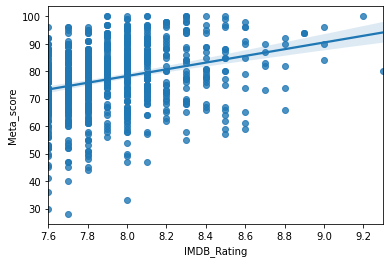

In [5]:
# Building a column showing the initially missing values in the column 'Meta_score'
df_imdb['Metascore_NaN']=np.NaN
df_imdb['Metascore_NaN']=list(df_imdb['Meta_score'].isnull())
#Plotting a graph showing the relationship
sns.regplot(x=df_imdb['IMDB_Rating'], y=df_imdb['Meta_score'])

In [6]:
#Replacing NaN in the ratings column with averages
avg_Meta_score = df_imdb["Meta_score"].astype("float").mean(axis=0)
df_imdb["Meta_score"].replace(np.nan,avg_Meta_score, inplace=True)

In [7]:
# Analysis of values in the 'Released_Year' column
df_imdb['Released_Year'].unique()
df_imdb['Series_Title'].loc[df_imdb['Released_Year']=='PG']
print(df_imdb['Released_Year'][803])
df_imdb['Released_Year'][803]='1995'
df_imdb.Released_Year.astype(int)
df_imdb['Released_Year'].dtype

PG


<ipython-input-7-fb6ada373d22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb['Released_Year'][803]='1995'


dtype('O')

In [8]:
# Converting the 'Runtime' column to numeric values
for i in range(len(df_imdb['Runtime'])):
    g = df_imdb.Runtime[i].split()
    g.remove('min')
    df_imdb.Runtime[i] = ''.join(g)
df_imdb['Runtime'].head()

<ipython-input-8-b0b72bfcc000>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb.Runtime[i] = ''.join(g)


0    142
1    175
2    152
3    202
4     96
Name: Runtime, dtype: object

In [12]:
from Famous_directors import Famous_directors

In [13]:
# Identifing famous and unknown directors
df_imdb['Director'].value_counts()
df_imdb['Director'].unique()
df_imdb['F_Directors'] = np.NaN
df_imdb['F_Directors']=list(df_imdb['Director'].isin(Famous_directors))

In [14]:
#Replacing with numeric values
df_imdb.F_Directors.replace({True: 1, False: 0}, inplace = True)

In [17]:
from Famous_people import famous_actors

In [18]:
# Identifing famous and unknown actors
df_imdb['F_star'] = np.NaN

In [19]:
#Replacing with numeric values
df_imdb['F_star']=list(df_imdb['Star1'].isin(famous_actors))
df_imdb.F_star.replace({True: 1, False: 0}, inplace = True)
df_imdb['F2_star'] = np.NaN
df_imdb['F2_star']=list(df_imdb['Star2'].isin(famous_actors))
df_imdb.F2_star.replace({True: 1, False: 0}, inplace = True)
df_imdb['F3_star'] = np.NaN
df_imdb['F3_star']=list(df_imdb['Star3'].isin(famous_actors))
df_imdb.F3_star.replace({True: 1, False: 0}, inplace = True)
df_imdb['F4_star'] = np.NaN
df_imdb['F4_star']=list(df_imdb['Star4'].isin(famous_actors))
df_imdb.F4_star.replace({True: 1, False: 0}, inplace = True)

In [20]:
# Removing unnecessary columns
del df_imdb['Star1']
del df_imdb['Star2']
del df_imdb['Star3']
del df_imdb['Star4']
del df_imdb['Director']
del df_imdb['Genre']

In [21]:
# Converting columns to a numeric format
df_imdb['Released_Year'] = df_imdb['Released_Year'].astype(str).astype(int)
df_imdb['Released_Year'].dtype
df_imdb['Gross'] = df_imdb['Gross'].astype(str).astype(int)
df_imdb['Gross'].dtype
df_imdb['Runtime'] = df_imdb['Runtime'].astype(str).astype(int)   
df_imdb['Runtime'].dtype
df_imdb['IMDB_Rating'].dtype
df_imdb['Meta_score'].dtype
df_imdb['No_of_Votes'].dtype

dtype('int64')

In [23]:
# Processing of the received table
df_imdb = df_imdb[[c for c in df_imdb if c not in ['Gross']] 
       + ['Gross']]
df_imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Metascore_NaN,F_Directors,F_star,F2_star,F3_star,F4_star,Gross
0,The Shawshank Redemption,1994,18,142,9.3,80.0,2343110,False,1,1,1,0,0,28341469
1,The Godfather,1972,18,175,9.2,100.0,1620367,False,1,1,1,1,1,134966411
2,The Dark Knight,2008,14,152,9.0,84.0,2303232,False,1,1,1,0,1,534858444
3,The Godfather: Part II,1974,18,202,9.0,90.0,1129952,False,1,1,1,1,1,57300000
4,12 Angry Men,1957,16,96,9.0,96.0,689845,False,1,0,0,1,0,4360000


In [ ]:
df_imdb.to_csv('C:/Users/user/Desktop/Data science/Мо/imdb_pre-processing.csv', encoding='utf-8', index=False)